
# Análisis Exploratorio (EDA) WiDS 2024

**Tema:** Diagnóstico temprano de cáncer de mama y variables asociadas al estado de salud y residencia de pacientes.  
**Competencia:** [WiDS Datathon 2024 — Challenge 1](https://www.kaggle.com/competitions/widsdatathon2024-challenge1)  

**Objetivo de esta actividad:** 
Análisis Exploratorio de Datos (EDA) para comprender:
- tipos de variables, distribuciones, valores faltantes, inconsistencias y categorías (entre train y test),
- relaciones básicas con la variable objetivo **`DiagPeriod90`** (en `train`),
- y dejar lista una **base de preparación** para el modelado posterior.



## Contenido del Notebook
1. **importación de librerías y Configuración de rutas**  
2. **Carga y revisión general** (dimensiones, tipos, primeras filas)  
3. **Comparación de columnas entre `train` y `test`**  
4. **Valores únicos y categorías** (desalineaciones y criterios de solución)  
5. **Valores faltantes y anomalías** (nulos >30%, imputación/eliminación; detección de outliers)  
6. **Distribuciones de variables y visualizaciones**  
7. **Relaciones con `DiagPeriod90`** (conteos, comparaciones básicas)  
8. **Conclusiones y preparación para modelado** (resumen + transformaciones propuestas)  

## 1. Importación de Librerías y Carga de los Dataset

In [106]:
# Se importan las librearías necesarias para trabajar con los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import os
import re 

In [107]:
# Se cargan los Datasets y se muestran las primeras 5 filas
df_training = pd.read_csv('../data/training.csv')
df_test = pd.read_csv('../data/test.csv')
display(df_training.head())
display(df_test.head())

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


## Comparación de Columnas entre los Dataset

In [108]:
# Se listan las columnas de cada DataFrame
cols_train = df_training.columns
cols_test = df_test.columns

# Si no son idénticos, mostramos las diferencias
if not same_columns:
    missing_in_test  = list(set(cols_train) - set(cols_test)) 
    missing_in_train = list(set(cols_test)  - set(cols_train))

    print("\nColumnas presentes en training pero FALTANTES en test:")
    print(missing_in_test if missing_in_test else "Ninguna")

    print("\nColumnas presentes en test pero FALTANTES en training:")
    print(missing_in_train if missing_in_train else "Ninguna")
else:
    print("\nAmbos datasets contienen el mismo conjunto de columnas.")

# Mostramos cuántas columnas y filas tiene cada dataset
print("\nResumen rápido:")
print(f" - df_training: {df_training.shape[0]} filas, {df_training.shape[1]} columnas")
print(f" - df_test:     {df_test.shape[0]} filas, {df_test.shape[1]} columnas")



Columnas presentes en training pero FALTANTES en test:
['DiagPeriodL90D']

Columnas presentes en test pero FALTANTES en training:
Ninguna

Resumen rápido:
 - df_training: 12906 filas, 83 columnas
 - df_test:     5792 filas, 82 columnas


# Revisión de valores únicos y categorías


In [109]:
# Identificar columnas categóricas
# (Aquellas de tipo 'object' o 'category')
cat_cols = df_training.select_dtypes(include=['object', 'category']).columns.tolist()

print(f" Se detectaron {len(cat_cols)} columnas categóricas en el dataset de entrenamiento.\n")

# Contar valores únicos por columna (solo categóricas)
print(" Número de valores únicos por columna categórica (train):")
unique_counts_train = df_training[cat_cols].nunique(dropna=True).sort_values(ascending=False)
display(unique_counts_train)

print(" Número de valores únicos por columna categórica (test):")
unique_counts_test = df_test[cat_cols].nunique(dropna=True).sort_values(ascending=False)
display(unique_counts_test)

# Comparar los valores únicos entre train y test
print("\n Comparación de valores únicos (train vs test):")
differences = []

for col in cat_cols:
    train_vals = set(df_training[col].dropna().unique())
    test_vals  = set(df_test[col].dropna().unique())

    only_in_train = train_vals - test_vals
    only_in_test  = test_vals - train_vals

    if only_in_train or only_in_test:
        differences.append({
            "columna": col,
            "solo_en_train": list(only_in_train)[:10],  # mostramos hasta 10 para no saturar
            "solo_en_test": list(only_in_test)[:10]
        })

if differences:
    print(f" Se encontraron {len(differences)} columnas con diferencias de categorías.\n")
    diff_df = pd.DataFrame(differences)
    display(diff_df)
else:
    print(" Todas las variables categóricas comparten los mismos valores únicos en train y test.")



 Se detectaron 11 columnas categóricas en el dataset de entrenamiento.

 Número de valores únicos por columna categórica (train):


patient_state                            50
breast_cancer_diagnosis_code             50
breast_cancer_diagnosis_desc             50
metastatic_cancer_diagnosis_code         43
Division                                  9
patient_race                              5
Region                                    4
payer_type                                3
metastatic_first_novel_treatment          2
patient_gender                            1
metastatic_first_novel_treatment_type     1
dtype: int64

 Número de valores únicos por columna categórica (test):


patient_state                            46
breast_cancer_diagnosis_code             46
breast_cancer_diagnosis_desc             46
metastatic_cancer_diagnosis_code         36
Division                                  9
patient_race                              5
Region                                    4
payer_type                                3
metastatic_first_novel_treatment          2
patient_gender                            1
metastatic_first_novel_treatment_type     1
dtype: int64


 Comparación de valores únicos (train vs test):
 Se encontraron 4 columnas con diferencias de categorías.



,columna,solo_en_train,solo_en_test
0,patient_state,"[PR, CT, RI, NH]",[]
1,breast_cancer_diagnosis_code,"[1759, C5001, C50, C5051, C50021, C5011]","[C50922, C50921]"
2,breast_cancer_diagnosis_desc,[Malignant neoplasm of central portion of brea...,[Malignant neoplasm of unspecified site of lef...
3,metastatic_cancer_diagnosis_code,"[C7962, C7830, C7901, C7910, C784, C7919, C7911]",[]


# Solución a las diferencias de categorías entre Train y Test

In [110]:
# Función de limpieza general de texto
def limpiar_cadena(s):
    # Limpia espacios, mayúsculas, acentos y caracteres especiales.
    if isinstance(s, str):
        s = s.strip() # elimina espacios al inicio/fin
        s = re.sub(r"\s+", " ", s) # reemplaza espacios múltiples
        s = s.lower() # convierte a minúsculas
        s = unidecode.unidecode(s) # elimina acentos (á -> a, ñ -> n)
    return s

# Aplicar limpieza a todas las columnas categóricas
cat_cols = df_training.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Limpieza de texto aplicada a {len(cat_cols)} columnas categóricas.")

for col in cat_cols:
    df_training[col] = df_training[col].astype(str).apply(limpiar_cadena)
    df_test[col] = df_test[col].astype(str).apply(limpiar_cadena)

# Unificar categorías raras (de baja frecuencia)
# Cualquier valor que aparezca menos del 1% de las veces en train se reemplaza por 'otras'
for col in cat_cols:
    freqs = df_training[col].value_counts(normalize=True)
    rare_categories = freqs[freqs < 0.01].index  # <1% del total
    df_training[col] = df_training[col].replace(rare_categories, 'otras')
    # Asegurar consistencia en test también
    df_test[col] = df_test[col].replace(rare_categories, 'otras')

print("Categorías raras agrupadas en 'otras'.")

# Alinear dominios (train U test)
# Esto asegura que ambos datasets tengan las mismas categorías
for col in cat_cols:
    categorias_comunes = sorted(list(set(df_training[col].dropna().unique()) | set(df_test[col].dropna().unique())))
    tipo_categ = pd.api.types.CategoricalDtype(categories=categorias_comunes)
    df_training[col] = df_training[col].astype(tipo_categ)
    df_test[col] = df_test[col].astype(tipo_categ)

print("Dominios de categorías alineados entre train y test (mismo universo de valores).")

# Verificación final: diferencias restantes
diferencias_finales = []
for col in cat_cols:
    tr_vals = set(df_training[col].dropna().unique())
    te_vals = set(df_test[col].dropna().unique())
    if tr_vals != te_vals:
        diferencias_finales.append(col)

if not diferencias_finales:
    print("\nTodo listo: train y test tienen las mismas categorías en todas las variables.")
else:
    print("\nAún quedan diferencias en las columnas:", diferencias_finales)
    print(f"Se encontraron {len(differences)} columnas con diferencias de categorías.\n")

Limpieza de texto aplicada a 11 columnas categóricas.
Categorías raras agrupadas en 'otras'.
Dominios de categorías alineados entre train y test (mismo universo de valores).

Aún quedan diferencias en las columnas: ['breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc']
Se encontraron 4 columnas con diferencias de categorías.



# Valores faltantes y Anomalías Numéricas
* Porcentaje de valores nulos por columna (en train)

Porcentaje de valores nulos por columna (Top 20):


bmi                            69.463815
N02                             0.224702
PM25                            0.224702
Ozone                           0.224702
income_household_25_to_35       0.030993
income_household_100_to_150     0.030993
income_household_under_5        0.030993
income_household_5_to_10        0.030993
income_household_10_to_15       0.030993
income_household_15_to_20       0.030993
income_household_20_to_25       0.030993
income_household_35_to_50       0.030993
income_household_50_to_75       0.030993
income_household_75_to_100      0.030993
income_household_six_figure     0.030993
income_household_150_over       0.030993
family_size                     0.030993
home_ownership                  0.030993
home_value                      0.030993
rent_median                     0.030993
dtype: float64

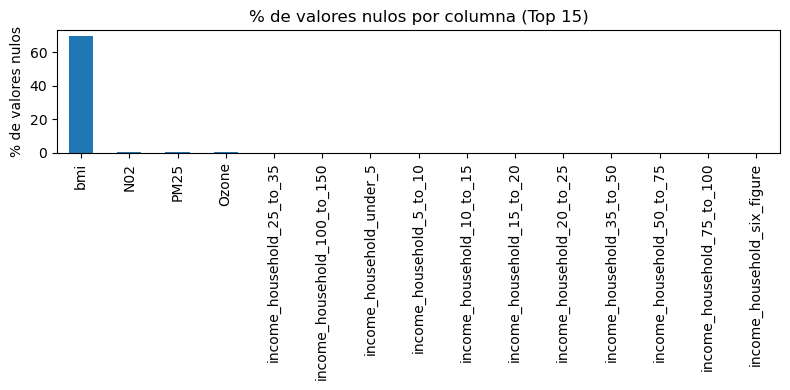


Se encontraron 1 columnas con más del 30% de nulos:



bmi    69.463815
dtype: float64


Recomendaciones:
- Columnas con más del 60–70 % de nulos: candidatas a eliminar si no son críticas.
- Columnas entre 30 % y 60 % de nulos: conviene imputar (media, mediana o moda, según el tipo).
- Variables con pocos nulos (<10 %): imputación directa es suficiente.
- También puede ser útil crear una columna binaria que indique si el valor estaba faltante (indicador de 'missing').



In [111]:
# .isna() crea una matriz booleana (True donde hay NaN)
# .mean() calcula el promedio de True (= porcentaje de nulos)
missing_pct = df_training.isna().mean().sort_values(ascending=False) * 100 # Convertimos a porcentaje 
print("Porcentaje de valores nulos por columna (Top 20):")
display(missing_pct.head(20))

# Visualización del porcentaje de nulos (solo las más altas)
missing_pct.head(15).plot(kind='bar', figsize=(8,4), title='% de valores nulos por columna (Top 15)')
plt.ylabel('% de valores nulos')
plt.tight_layout()
plt.show()

# Columnas con más del 30% de nulos ---
cols_high_missing = missing_pct[missing_pct > 30]
print(f"\nSe encontraron {len(cols_high_missing)} columnas con más del 30% de nulos:\n")
display(cols_high_missing)

# Comentario sugerido (ajustable según los resultados) ---
print("""
Recomendaciones:
- Columnas con más del 60–70 % de nulos: candidatas a eliminar si no son críticas.
- Columnas entre 30 % y 60 % de nulos: conviene imputar (media, mediana o moda, según el tipo).
- Variables con pocos nulos (<10 %): imputación directa es suficiente.
- También puede ser útil crear una columna binaria que indique si el valor estaba faltante (indicador de 'missing').
""")


# Detección de Anmalías Numéricas (Outliers)

In [112]:
# Análisis estadístico y detección de outliers en variables numéricas
# Seleccionamos solo columnas numéricas
num_cols = df_training.select_dtypes(include=[np.number]).columns.tolist()

# Creamos un resumen estadístico
desc = df_training[num_cols].describe().T

# Calculamos el rango intercuartílico (IQR)
desc["IQR"] = desc["75%"] - desc["25%"]
desc["lim_inf"] = desc["25%"] - 1.5 * desc["IQR"]
desc["lim_sup"] = desc["75%"] + 1.5 * desc["IQR"]

print("\nResumen estadístico de las variables numéricas:")
display(desc.head(10))

# Detección de outliers con base en IQR ---
outlier_summary = []
for col in num_cols:
    low, high = desc.loc[col, "lim_inf"], desc.loc[col, "lim_sup"]
    n_outliers = ((df_training[col] < low) | (df_training[col] > high)).sum()
    pct_outliers = n_outliers / len(df_training) * 100
    if pct_outliers > 0:
        outlier_summary.append({
            'variable': col,
            'outliers (%)': round(pct_outliers, 2),
            'min': df_training[col].min(),
            'max': df_training[col].max(),
            'Q1': desc.loc[col, '25%'],
            'Q3': desc.loc[col, '75%']
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('outliers (%)', ascending=False)
print("\nVariables con valores extremos detectados (por IQR):")
display(outlier_df.head(15))

# Z-score mide cuántas desviaciones estándar se aleja un valor de la media
z_out_counts = {}
for c in num_cols:
    s = df_training[c]
    mu, sd = s.mean(), s.std(ddof=0)
    if sd and not np.isnan(sd):
        z = (s - mu) / sd
        z_out_counts[c] = int((z.abs() > 4).sum())

z_out_top = sorted(z_out_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop variables con más outliers por z-score (|z|>4):")
for var, n in z_out_top:
    print(f" - {var}: {n} valores extremos")

# Recomendación sobre los Outlires
print("""
Sugerencias para tratar valores extremos:
1. **Verificar su validez**: a veces representan casos reales y deben conservarse.
2. **Winsorización**: limitar los valores al percentil 1 % y 99 %.
3. **Transformaciones**: aplicar logaritmo o raíz cuadrada para reducir sesgo.
4. **Imputación o eliminación**: si los valores son claramente erróneos o faltantes codificados (ej. 9999).
""")


Resumen estadístico de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max,IQR,lim_inf,lim_sup
patient_id,12906.0,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.00000,451154.750000,-355215.125000,1.449404e+06
patient_zip3,12906.0,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.00000,515.000000,-441.500000,1.618500e+03
patient_age,12906.0,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.00000,17.000000,24.500000,9.250000e+01
bmi,3941.0,28.984539,5.696906,14.000000,24.660000,28.190000,32.920000,85.00000,8.260000,12.270000,4.531000e+01
population,12905.0,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.13158,20557.382138,-21372.176655,6.085735e+04
density,12905.0,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.00000,1494.658242,-2070.130220,3.908503e+03
age_median,12905.0,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.57000,5.804958,28.422387,5.164222e+01
age_under_10,12905.0,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.67500,2.030000,7.115000,1.523500e+01
age_10_to_19,12905.0,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.30000,2.278591,8.323290,1.743765e+01
age_20s,12905.0,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.10000,3.957638,5.076958,2.090751e+01



Variables con valores extremos detectados (por IQR):


,variable,outliers (%),min,max,Q1,Q3
54,race_native,9.65,0.000000,7.693478e+01,0.212963,0.790000
65,Ozone,9.25,30.939316,5.223721e+01,37.698880,41.136513
51,farmer,9.13,0.000000,2.672941e+01,0.042857,2.316071
53,race_asian,8.98,0.000000,4.985000e+01,1.096491,7.066667
38,home_value,8.90,60629.000000,1.853109e+06,167760.454500,405882.250000
61,limited_english,8.76,0.000000,2.675500e+01,0.994444,5.976000
3,density,8.46,0.916667,2.117200e+04,171.857143,1666.515385
55,race_pacific,7.96,0.000000,1.475844e+01,0.024138,0.146667
56,race_other,6.56,0.002564,3.318889e+01,1.314085,7.918182
66,PM25,6.44,2.636008,1.116941e+01,6.651215,8.276922



Top variables con más outliers por z-score (|z|>4):
 - density: 319 valores extremos
 - race_asian: 175 valores extremos
 - farmer: 126 valores extremos
 - male: 124 valores extremos
 - female: 124 valores extremos
 - race_black: 121 valores extremos
 - veteran: 115 valores extremos
 - age_over_80: 97 valores extremos
 - education_graduate: 85 valores extremos
 - education_less_highschool: 78 valores extremos

Sugerencias para tratar valores extremos:
1. **Verificar su validez**: a veces representan casos reales y deben conservarse.
2. **Winsorización**: limitar los valores al percentil 1 % y 99 %.
3. **Transformaciones**: aplicar logaritmo o raíz cuadrada para reducir sesgo.
4. **Imputación o eliminación**: si los valores son claramente erróneos o faltantes codificados (ej. 9999).




## 6) Distribuciones de variables y visualizaciones
- Usamos **matplotlib** (sin estilos/colores específicos).  
- Cada gráfico en su **propia figura**.


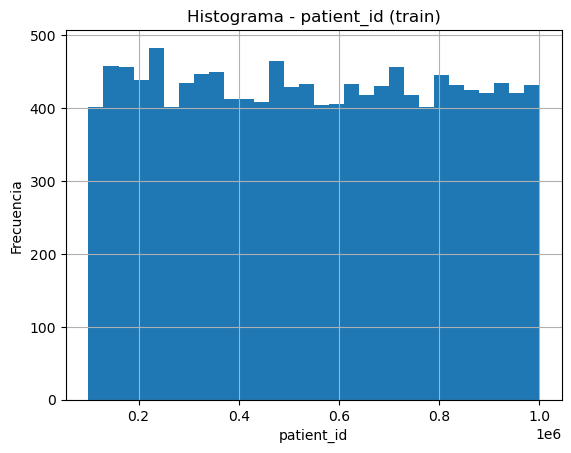

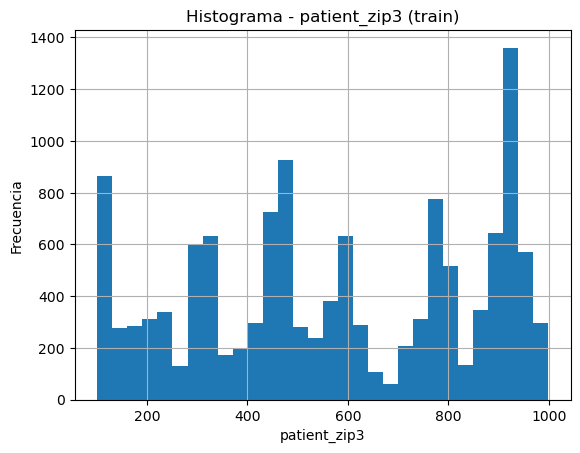

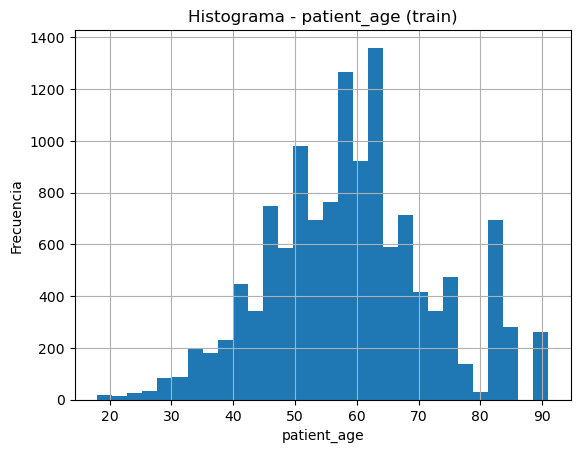

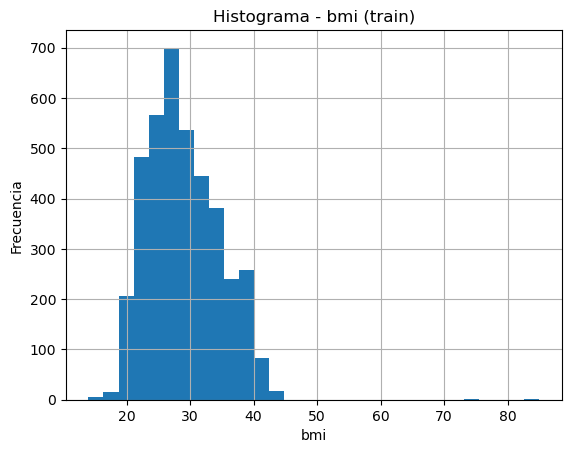

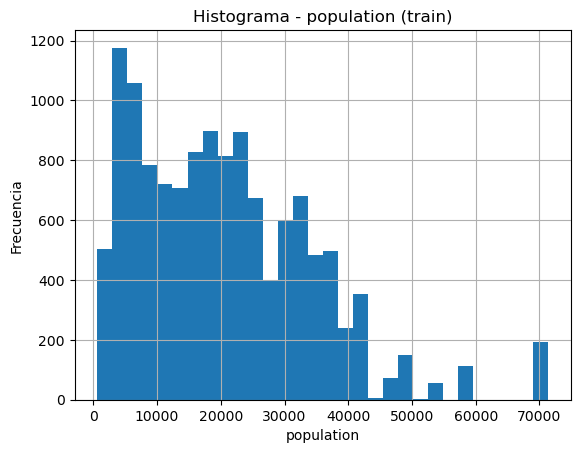

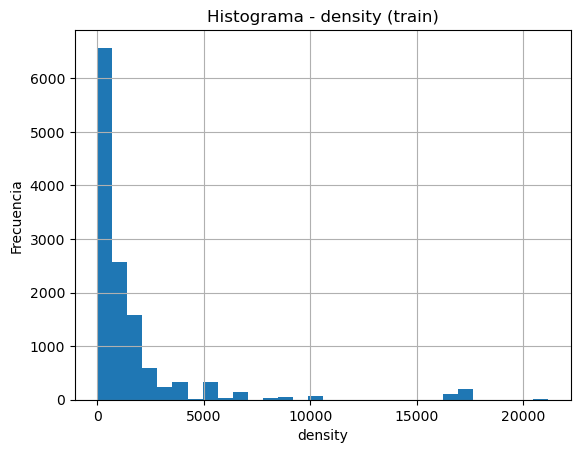

In [113]:

num_to_plot = numeric_cols[:6]
for col in num_to_plot:
    plt.figure()
    train[col].dropna().hist(bins=30)
    plt.title(f"Histograma - {col} (train)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


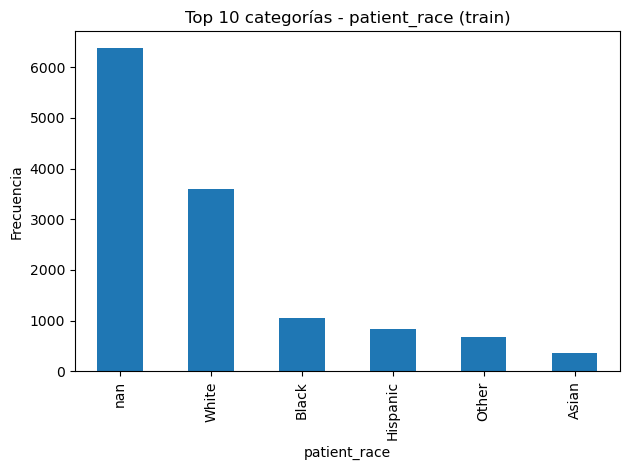

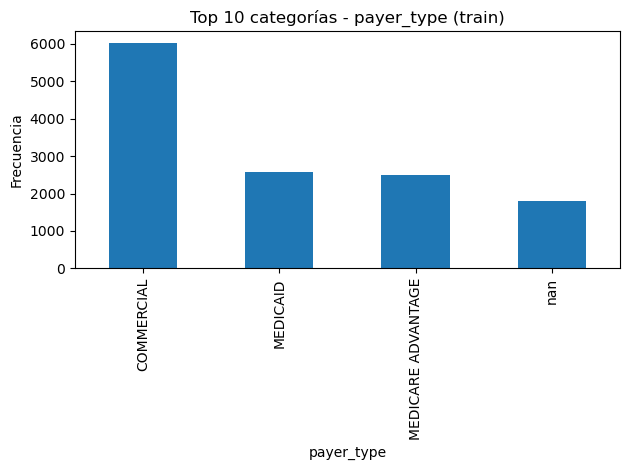

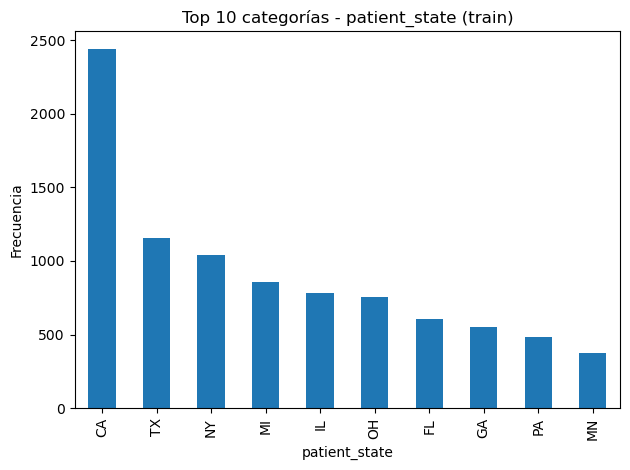

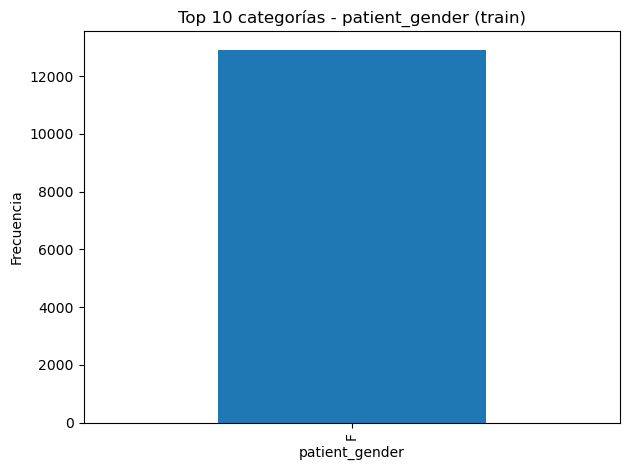

In [114]:

cat_to_plot = categorical_cols[:4]
for col in cat_to_plot:
    vc = train[col].astype(str).value_counts().head(10)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(f"Top 10 categorías - {col} (train)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



## 7) Relaciones con la variable objetivo `DiagPeriod90`
Mostramos conteos y **boxplots** para algunas variables numéricas vs `DiagPeriod90`.


In [115]:

if 'DiagPeriod90' in train.columns:
    print("Distribución de DiagPeriod90 (train):")
    print(train['DiagPeriod90'].value_counts(dropna=False))
    
    cols_for_box = [c for c in numeric_cols if c != 'DiagPeriod90'][:4]
    for col in cols_for_box:
        tmp = train[[col, 'DiagPeriod90']].dropna()
        if tmp.empty:
            continue
        plt.figure() 
        tmp.boxplot(column=col, by='DiagPeriod90')
        plt.title(f"Boxplot de {col} por DiagPeriod90 (train)")
        plt.suptitle("")
        plt.xlabel("DiagPeriod90")
        plt.ylabel(col)
        plt.show()
else:
    print("No se encontró 'DiagPeriod90' en train. Revisa el nombre exacto de la columna objetivo.")


No se encontró 'DiagPeriod90' en train. Revisa el nombre exacto de la columna objetivo.



## 8) Conclusiones y preparación para el modelado

**Resumen recomendado (edita con tus hallazgos):**
- *Columnas idénticas/diferentes:* …  
- *Variables con >30% nulos y decisión:* …  
- *Principales outliers y tratamiento:* …  
- *Variables más útiles y por qué:* …  
- *Variables que requieren codificación/limpieza:* …  
- *Transformaciones aplicadas/propuestas:* normalización de categorías, imputación (mediana/moda), codificación One-Hot, escalado en fase de modelado, winsorización/log si aplica.



## (Opcional) Pipeline mínimo de preparación (sin modelar)
Transformaciones básicas para dejar datos listos para la siguiente etapa.


In [116]:

def normalize_text(x):
    if pd.isna(x):
        return x
    s = str(x)
    import unicodedata as _ud
    s = _ud.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not _ud.combining(ch))
    s = s.lower().strip()
    return s

def simple_prepare(train_df, test_df, target_col='DiagPeriod90'):
    tr = train_df.copy()
    te = test_df.copy()
    y = None
    if target_col in tr.columns:
        y = tr[target_col]
        tr = tr.drop(columns=[target_col])
    
    num_cols = [c for c in tr.columns if pd.api.types.is_numeric_dtype(tr[c])]
    cat_cols = [c for c in tr.columns if c not in num_cols]
    
    for col in cat_cols:
        if pd.api.types.is_object_dtype(tr[col]) or pd.api.types.is_categorical_dtype(tr[col]):
            tr[col] = tr[col].apply(normalize_text)
        if col in te.columns and (pd.api.types.is_object_dtype(te[col]) or pd.api.types.is_categorical_dtype(te[col])):
            te[col] = te[col].apply(normalize_text)
    
    for col in num_cols:
        med = tr[col].median()
        tr[col] = tr[col].fillna(med)
        if col in te.columns:
            te[col] = te[col].fillna(med)
    for col in cat_cols:
        mode = tr[col].mode(dropna=True)
        fill_val = mode.iloc[0] if not mode.empty else "unknown"
        tr[col] = tr[col].fillna(fill_val)
        if col in te.columns:
            te[col] = te[col].fillna(fill_val)
    
    tr_enc = pd.get_dummies(tr, drop_first=False)
    te_enc = pd.get_dummies(te, drop_first=False)
    te_enc = te_enc.reindex(columns=tr_enc.columns, fill_value=0)
    
    if y is not None:
        tr_enc[target_col] = y.values
    
    return tr_enc, te_enc

# Uso sugerido (ejecutar si deseas generar conjuntos preparados):
# prepared_train, prepared_test = simple_prepare(train, test)
# display(prepared_train.head())
# display(prepared_test.head())



### Mejores prácticas incorporadas
- **Funciones reutilizables** y normalización de categorías.
- **Comentarios línea a línea** para docencia/entrega.
- **Alineación train/test** tras One-Hot (reindex).
- Cumple todos los puntos: dimensiones, tipos, comparación de columnas, nulos, outliers, distribuciones y relación con `DiagPeriod90`.
